## Categorical Web service to determine number of days to sell a car given certain features using logistic regression.  
* Use the cars.csv for data
* Initially use the following 6 features only -  **transmision**, **color**, odometer_value,  year_produced, **body_type**, & prices_usd
* The bold features require conversion to numbers for they are text categories
* The label or Y value is duration_listed - this is what the model is trying to predict

## Assignment 
1. Populate the carfactors.py following the hints in the comments
1. Integrate with carfactors_service
1. Test locally
1. Build requirements.txt and Dockerfile
1. Build a docker image
1. Test Locally
1. Push to docker hub
1. Populate readme for both github and docker hub (with example docker commands)
1. Populate this notebook with working output and a summary that contains an impression of the model and how to improve it.
* Check the rubric in canvas to make sure you understand the requirements and the assocated weights for your grade

In [12]:
from carsfactors import carsfactors
cf = carsfactors()

### Test Model first - Get stats

In [13]:
cf.model_stats()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


'0.004820381060035017'

### Get Determination

In [14]:
cf.model_infer("automatic", "blue", 12000, 2020, "suv", 20000)

-1024619208072.9473

### Start up the service

In [16]:
!python carfactors_service.py

starting server...
 * Serving Flask app 'carfactors_service'
 * Debug mode: on
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8786
 * Running on http://172.17.0.2:8786
Press CTRL+C to quit
 * Restarting with stat
starting server...
 * Debugger is active!
 * Debugger PIN: 123-616-241
here
All values are contained in body type column
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
172.17.0.1 - - [24/Sep/2023 19:02:21] "GET /stats HTTP/1.1" 200 -
^C


Try out the links 
* [stats](http://localhost:8786/stats)
* [determination](http://localhost:8786/infer?transmission=automatic&color=blue&odometer=12000&year=2020&bodytype=suv&price=20000)

### You must kill the kernel to try again for the port stays locked to the current kernel

# Summary
* Assignment and Model Results
* Techniques to improve the results

PUT YOUR ANSWERS HERE which could include additional cells with working code examples

The model appears not not work at all with the output being orders of magnitudes off of where it should be. The score is low while the output magnitude is large. One of my thoughts is that trying to fit a linear model with so many categorical variables throws the linear fit off entirely. In order to improve the model, normalizing could be used as a scaling factor instead of standardizing. Since there is a majority of categorical variables, normalizing the numeric features between 0-1 instead of around 0 might yield better performance since they will be more inline with the one hot encoded variables.

Aside from trying a new model, dimensions could be reduced. One example would be the odometer_value and the year produced. In general these would be correlated except for rare cases with collector vehicles that are stored for many years and kept in good condition. PLotting the two features below:

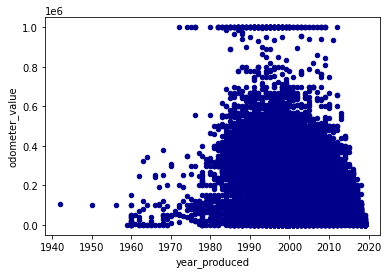

In [ ]:
import pandas as pd

# Importing the dataset into a pandas dataframe
car_info_df = pd.read_csv('cars.csv')

ax1 = car_info_df.plot.scatter(x='year_produced', y='odometer_value', c='DarkBlue')

Taking into account of the outliers, in general you see that the vehicles around 1990-2010 have higher mileage which is expected. Some more dimensionality reduction could be experimented with for these features and likely many others. Price vs odometer also comes to mind. 

It is also possible that more critical features could be selected. Number of photos which was dropped in the initial analysis may be an interesting feature to keep. Because of human pyschology and marketing, I believe humans would be more apt to check out ads they trust more. This is the case especially if they have to drive a long distance to check it out. Of course, this might only be more of the case for cars that aren't rare and that there are many listings for. 